In [1]:
# Default
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Visualization
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
sns.set_style('darkgrid')

# Others
import openpyxl
import xlrd
import os
import warnings
import statistics
#import category_encoders as ce
from math import isnan
#from kneed import KneeLocator
from scipy.spatial import ConvexHull

# Dimensionality reduction
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import (calculate_bartlett_sphericity,
                                             calculate_kmo,
                                             chi2)

In [2]:
# Metrics from Sklearn
from sklearn import metrics
from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (silhouette_score,
                             accuracy_score,
                             classification_report,
                             precision_score,
                             recall_score,
                             confusion_matrix,
                             roc_curve,
                             roc_auc_score,
                             f1_score, auc)
from sklearn.pipeline import make_pipeline

In [22]:
# Regression
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
import statsmodels.api as sm

In [5]:
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category = UserWarning)

In [6]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
set_config(display="text")  # displays text representation of estimators
plt.rcParams["figure.figsize"] = [7.2, 4.8]

In [7]:
# Dados dos empregados com vinculo ativo em 31/12 apenas da industria da transformação do ano de 2021
df_ind_trans = pd.read_csv(r"DF_Industria_tranformacao_2021.csv", sep=";", encoding='UTF-8', low_memory=False)
df_ind_trans.shape

(1146857, 24)

In [8]:
df_ind_trans.head()

,id,Faixa_Etária,Faixa_Hora_Contrat,Faixa_Tempo_Emprego,Escolaridade_após_2005,Qtd_Hora_Contr,Idade,Ind_Simples,Ind_Portador_Defic,Qtd_Dias_Afastamento,Raça_Cor,Vl_Remun_Dezembro_Nom,Sexo_Trabalhador,Tamanho_Estabelecimento,Tempo_Emprego,Tipo_Admissão,Tipo_Defic,Ind_Trab_Intermitente,Ind_Trab_Parcial,CNAE_2.0_Subclasse_targetencoder_,Tipo_Vínculo_targetencoder_,IBGE_Subsetor_targetencoder_,CBO_targetencoder_,cidades_targetencoder_
0,0,7,6,3,1,44,50,1,0,0,4,1372.730,1,4,7.300,2,0,0,0,2012.803,3363.495,2012.400,2455.315,2662.986
1,1,7,1,6,1,1,61,0,0,20,2,1340.190,1,7,37.600,0,0,0,0,3221.220,3363.495,4149.241,4420.601,3183.867
2,2,8,5,6,1,36,68,0,0,62,8,2263.800,1,7,38.900,0,0,0,0,3221.220,3363.495,4149.241,4420.601,3183.867
3,3,4,6,3,1,44,28,1,0,0,2,2083.360,1,3,6.100,2,0,0,0,2231.034,3363.495,1877.463,2210.861,1971.877
4,4,7,6,3,1,44,64,0,0,172,4,1417.420,1,6,9.600,2,0,0,0,3276.079,3363.495,4491.901,1583.565,2785.046


In [9]:
df_model = df_ind_trans.sample(frac = 0.5)
df_model.shape

(573428, 24)

In [10]:
df_seleted = df_model[['id']]
df_seleted['Select'] = 1
df_seleted.shape

C:\Users\luand\AppData\Local\Temp\ipykernel_17848\3788505534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seleted['Select'] = 1


(573428, 2)

In [11]:
df_ind_trans = df_ind_trans.merge(df_seleted, on=['id'], how='left')
df_ind_trans['Select'] = df_ind_trans['Select'].fillna(0)
df_ind_trans.head()

,id,Faixa_Etária,Faixa_Hora_Contrat,Faixa_Tempo_Emprego,Escolaridade_após_2005,Qtd_Hora_Contr,Idade,Ind_Simples,Ind_Portador_Defic,Qtd_Dias_Afastamento,Raça_Cor,Vl_Remun_Dezembro_Nom,Sexo_Trabalhador,Tamanho_Estabelecimento,Tempo_Emprego,Tipo_Admissão,Tipo_Defic,Ind_Trab_Intermitente,Ind_Trab_Parcial,CNAE_2.0_Subclasse_targetencoder_,Tipo_Vínculo_targetencoder_,IBGE_Subsetor_targetencoder_,CBO_targetencoder_,cidades_targetencoder_,Select
0,0,7,6,3,1,44,50,1,0,0,4,1372.730,1,4,7.300,2,0,0,0,2012.803,3363.495,2012.400,2455.315,2662.986,1.000
1,1,7,1,6,1,1,61,0,0,20,2,1340.190,1,7,37.600,0,0,0,0,3221.220,3363.495,4149.241,4420.601,3183.867,1.000
2,2,8,5,6,1,36,68,0,0,62,8,2263.800,1,7,38.900,0,0,0,0,3221.220,3363.495,4149.241,4420.601,3183.867,0.000
3,3,4,6,3,1,44,28,1,0,0,2,2083.360,1,3,6.100,2,0,0,0,2231.034,3363.495,1877.463,2210.861,1971.877,1.000
4,4,7,6,3,1,44,64,0,0,172,4,1417.420,1,6,9.600,2,0,0,0,3276.079,3363.495,4491.901,1583.565,2785.046,1.000


In [12]:
df_ind_trans['Select'].value_counts()

Select
0.000    573429
1.000    573428
Name: count, dtype: int64

In [13]:
lst_features = df_ind_trans.columns.tolist()
lst_features.remove('id')
lst_features.remove('Select')
lst_features

['Faixa_Etária',
 'Faixa_Hora_Contrat',
 'Faixa_Tempo_Emprego',
 'Escolaridade_após_2005',
 'Qtd_Hora_Contr',
 'Idade',
 'Ind_Simples',
 'Ind_Portador_Defic',
 'Qtd_Dias_Afastamento',
 'Raça_Cor',
 'Vl_Remun_Dezembro_Nom',
 'Sexo_Trabalhador',
 'Tamanho_Estabelecimento',
 'Tempo_Emprego',
 'Tipo_Admissão',
 'Tipo_Defic',
 'Ind_Trab_Intermitente',
 'Ind_Trab_Parcial',
 'CNAE_2.0_Subclasse_targetencoder_',
 'Tipo_Vínculo_targetencoder_',
 'IBGE_Subsetor_targetencoder_',
 'CBO_targetencoder_',
 'cidades_targetencoder_']

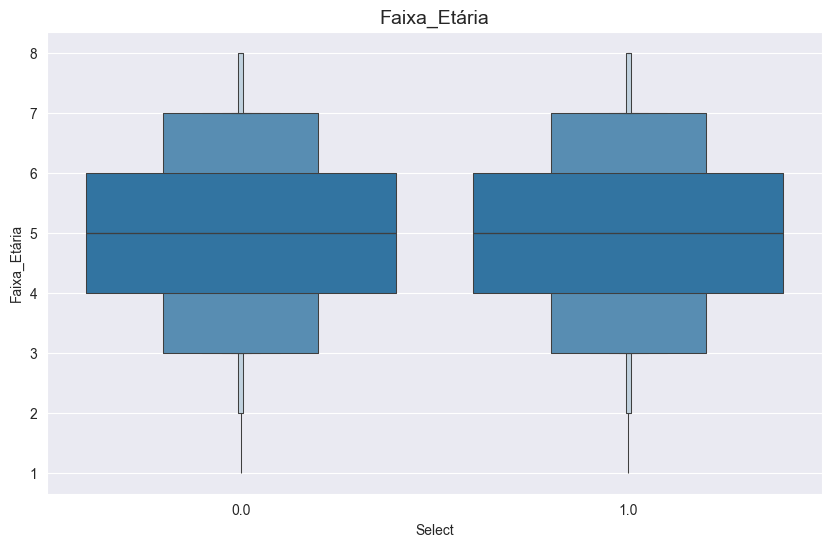

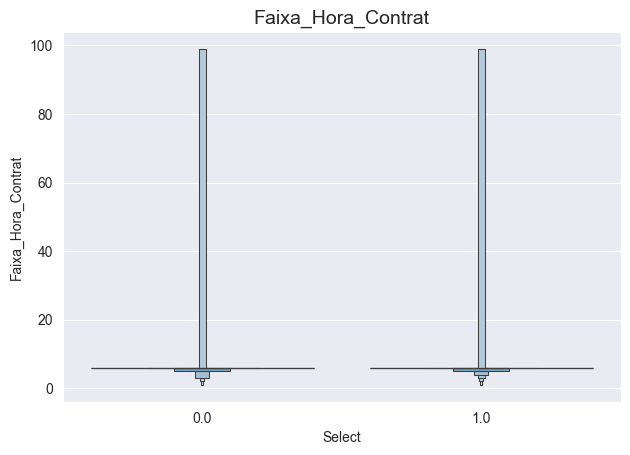

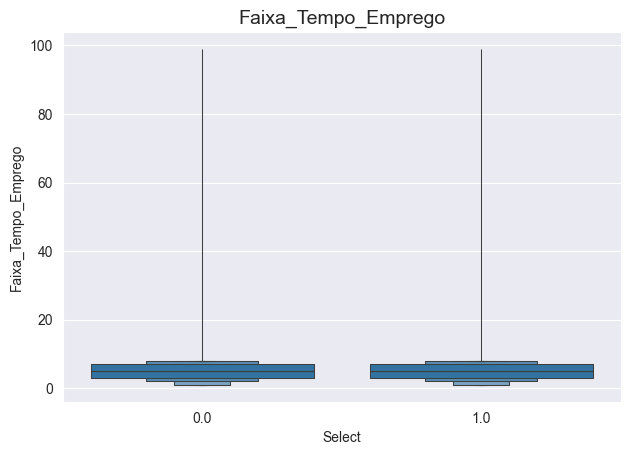

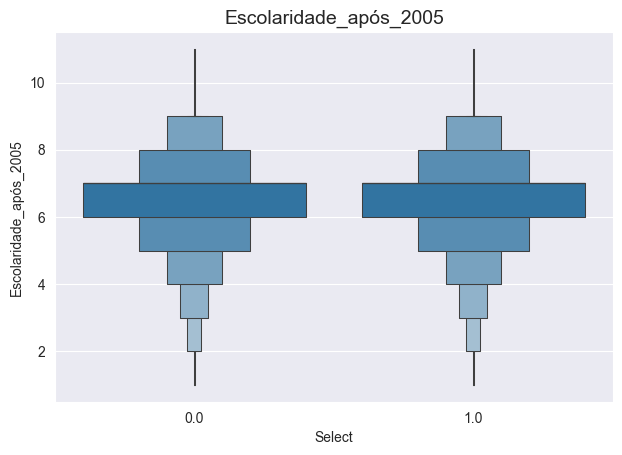

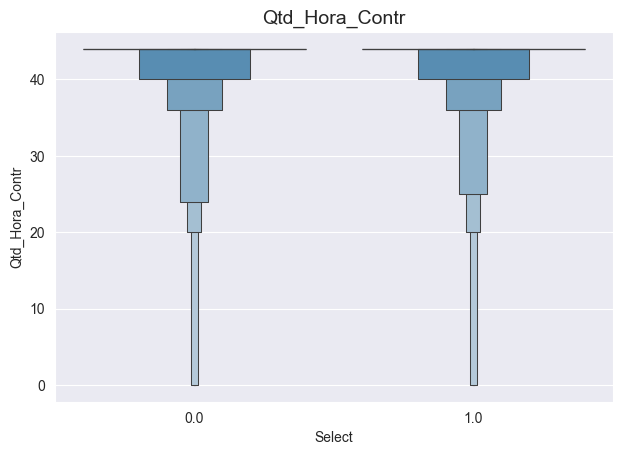

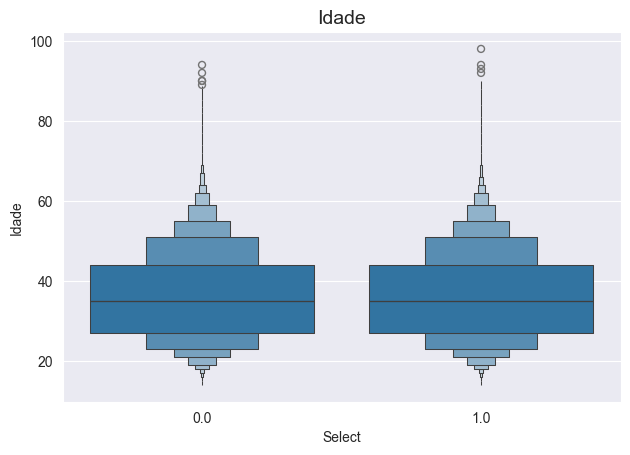

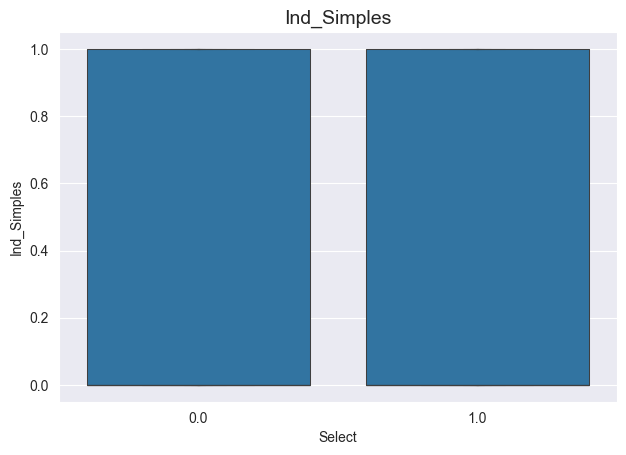

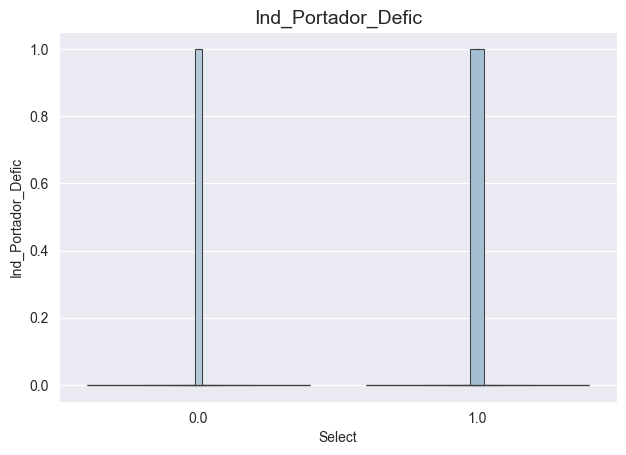

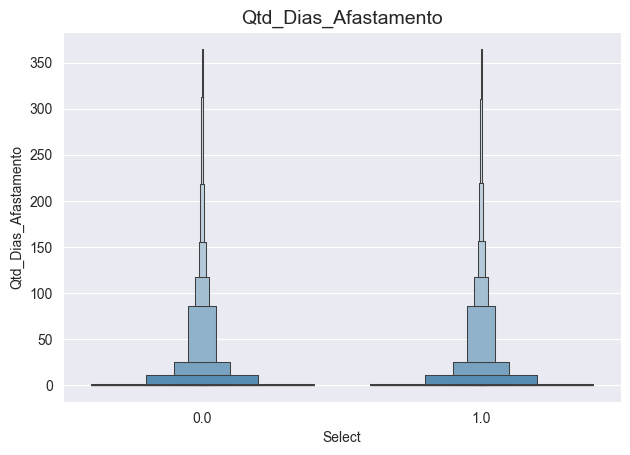

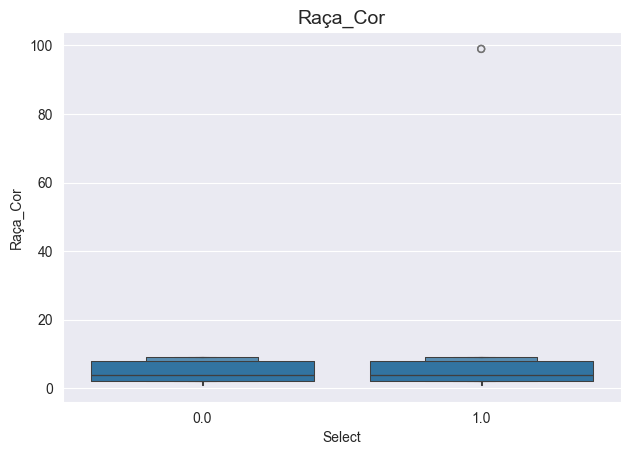

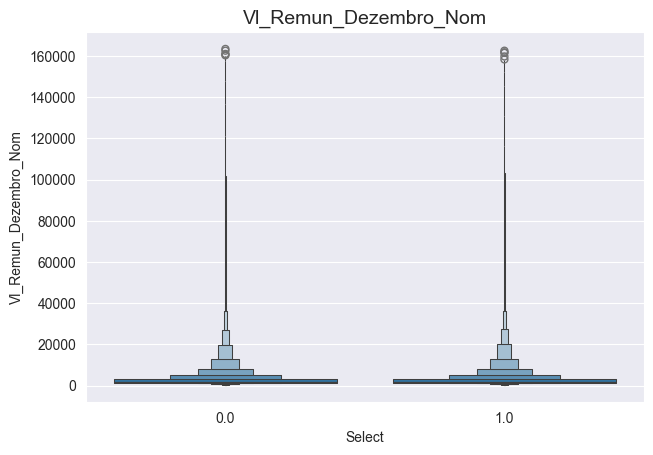

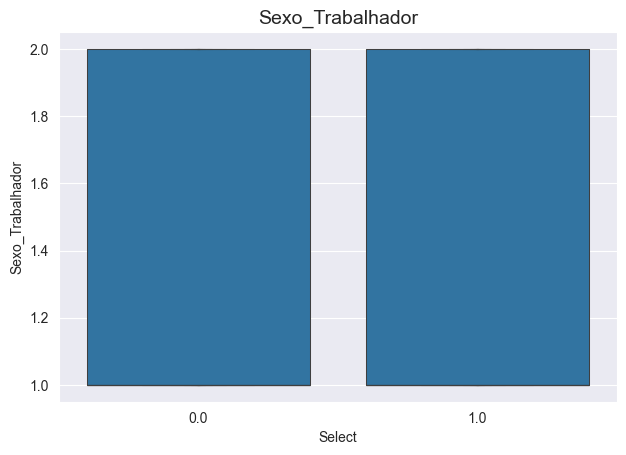

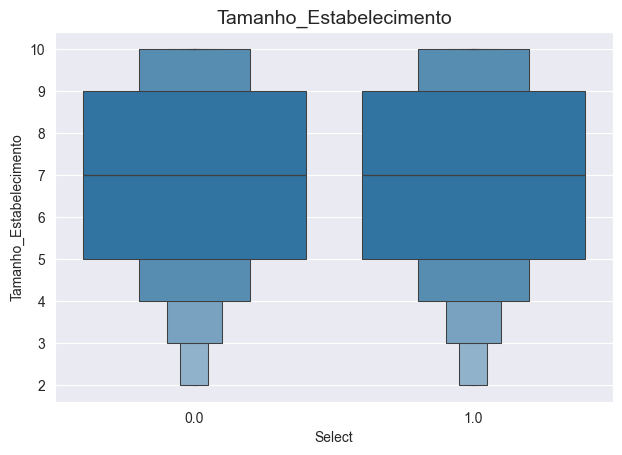

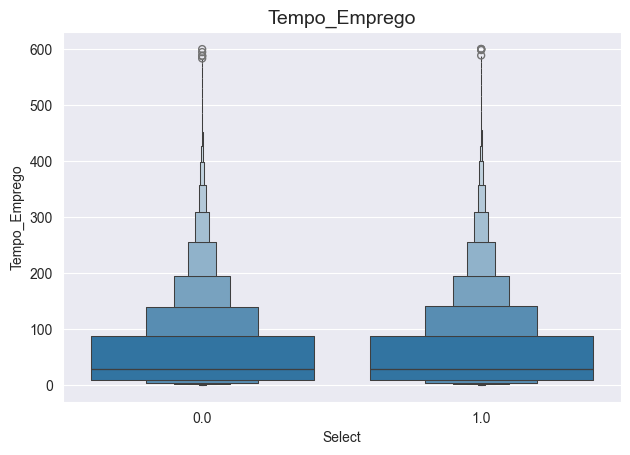

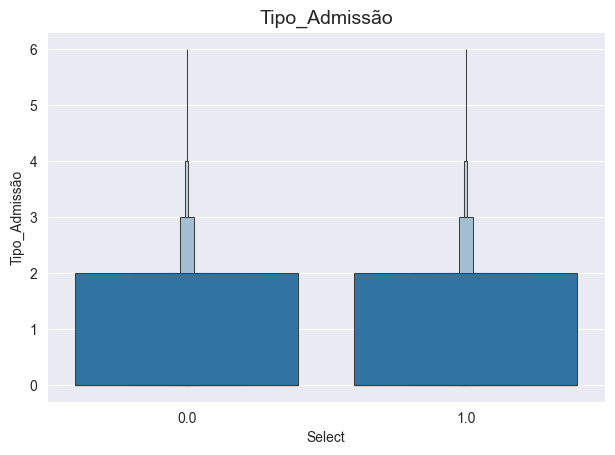

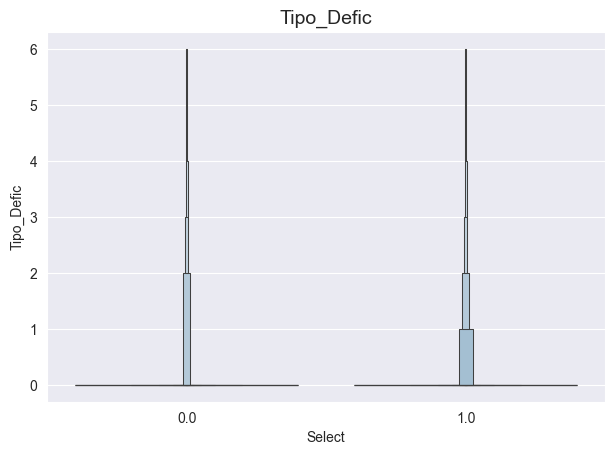

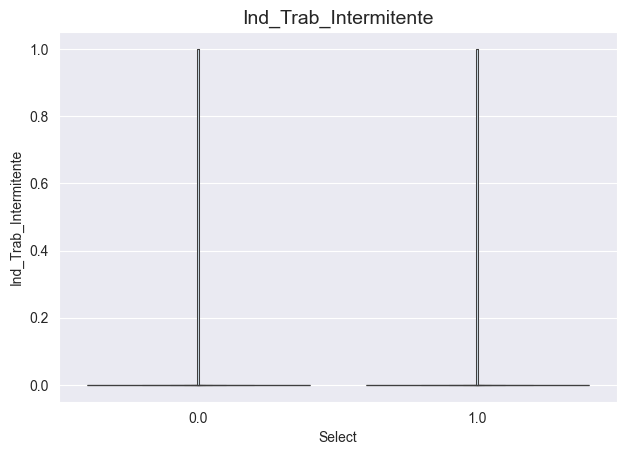

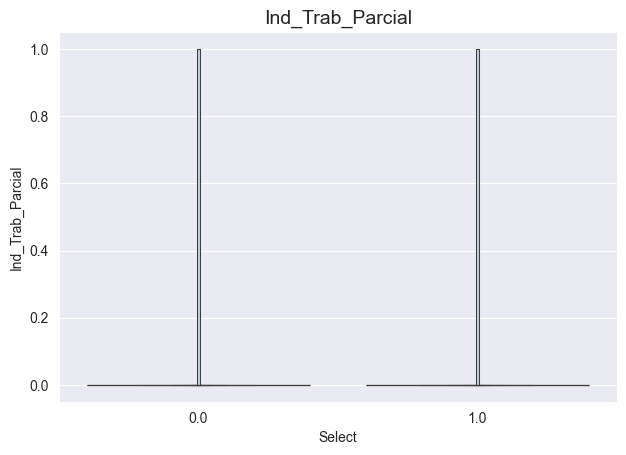

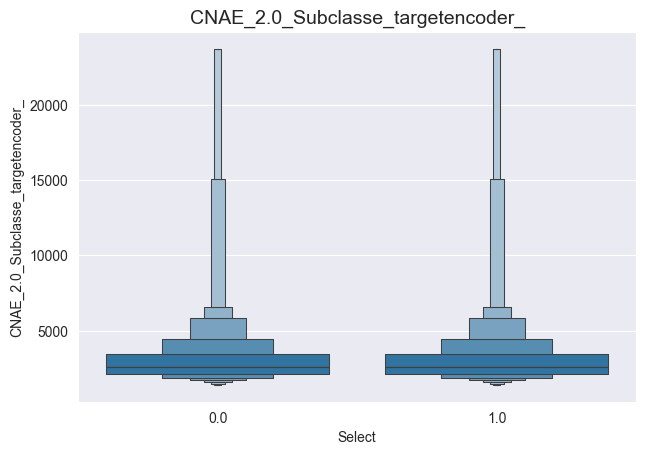

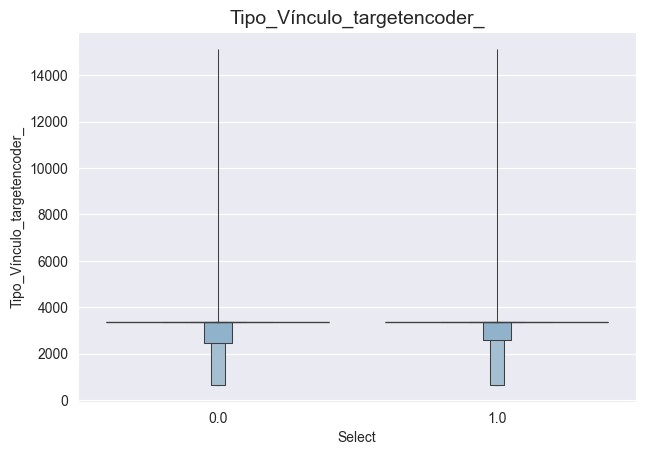

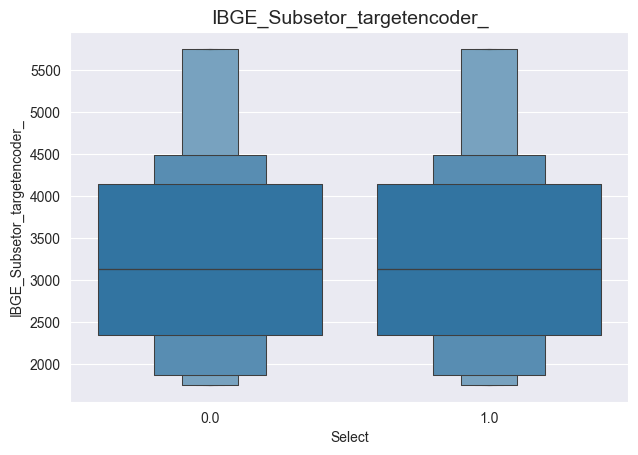

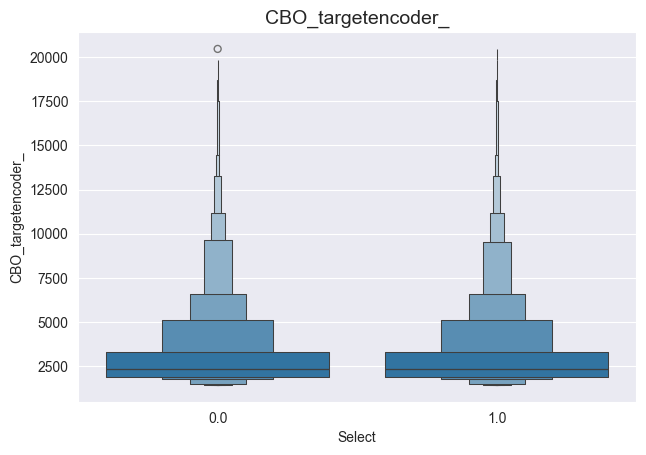

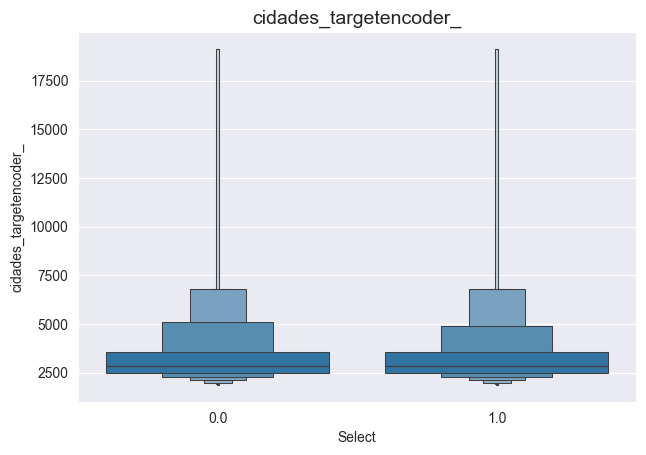

In [14]:
plt.figure(figsize=(10, 6))

for Names in lst_features: 
    ax = sns.boxenplot(data=df_ind_trans, x='Select', y=Names)
    ax.set_title(Names, fontdict={'fontsize': 14})
    plt.show()

In [15]:
df_ind_trans.head()

,id,Faixa_Etária,Faixa_Hora_Contrat,Faixa_Tempo_Emprego,Escolaridade_após_2005,Qtd_Hora_Contr,Idade,Ind_Simples,Ind_Portador_Defic,Qtd_Dias_Afastamento,Raça_Cor,Vl_Remun_Dezembro_Nom,Sexo_Trabalhador,Tamanho_Estabelecimento,Tempo_Emprego,Tipo_Admissão,Tipo_Defic,Ind_Trab_Intermitente,Ind_Trab_Parcial,CNAE_2.0_Subclasse_targetencoder_,Tipo_Vínculo_targetencoder_,IBGE_Subsetor_targetencoder_,CBO_targetencoder_,cidades_targetencoder_,Select
0,0,7,6,3,1,44,50,1,0,0,4,1372.730,1,4,7.300,2,0,0,0,2012.803,3363.495,2012.400,2455.315,2662.986,1.000
1,1,7,1,6,1,1,61,0,0,20,2,1340.190,1,7,37.600,0,0,0,0,3221.220,3363.495,4149.241,4420.601,3183.867,1.000
2,2,8,5,6,1,36,68,0,0,62,8,2263.800,1,7,38.900,0,0,0,0,3221.220,3363.495,4149.241,4420.601,3183.867,0.000
3,3,4,6,3,1,44,28,1,0,0,2,2083.360,1,3,6.100,2,0,0,0,2231.034,3363.495,1877.463,2210.861,1971.877,1.000
4,4,7,6,3,1,44,64,0,0,172,4,1417.420,1,6,9.600,2,0,0,0,3276.079,3363.495,4491.901,1583.565,2785.046,1.000


In [16]:
df_train = df_ind_trans[(df_ind_trans['Select'] == 1)]
df_test = df_ind_trans[(df_ind_trans['Select'] == 0)]
df_train.shape, df_test.shape

((573428, 25), (573429, 25))

In [17]:
df_train = df_train.drop(columns=['Select'])
df_test = df_test.drop(columns=['Select'])
df_train = df_train.set_index(['id'])
df_test = df_test.set_index(['id'])
df_train.shape, df_test.shape

((573428, 23), (573429, 23))

In [20]:
X = df_train.drop(columns='Vl_Remun_Dezembro_Nom')
y = df_train['Vl_Remun_Dezembro_Nom']
X.shape, y.shape

((573428, 22), (573428,))

In [23]:
mod = sm.OLS(y, X)    # Describe model
res = mod.fit()       # Fit model

In [24]:
print(res.summary())   # Summarize model

                                  OLS Regression Results                                  
Dep. Variable:     Vl_Remun_Dezembro_Nom   R-squared (uncentered):                   0.643
Model:                               OLS   Adj. R-squared (uncentered):              0.643
Method:                    Least Squares   F-statistic:                          4.704e+04
Date:                   Fri, 21 Jun 2024   Prob (F-statistic):                        0.00
Time:                           15:46:20   Log-Likelihood:                     -5.5137e+06
No. Observations:                 573428   AIC:                                  1.103e+07
Df Residuals:                     573406   BIC:                                  1.103e+07
Df Model:                             22                                                  
Covariance Type:               nonrobust                                                  
                                        coef    std err          t      P>|t|      [0.025 

In [25]:
np.exp(res.params)

Faixa_Etária                                                                     0.000
Faixa_Hora_Contrat                                                              27.508
Faixa_Tempo_Emprego                                                              0.000
Escolaridade_após_2005              33169175890440705606055699202937032335519606737...
Qtd_Hora_Contr                                                                   0.000
Idade                                                              101359234239196.625
Ind_Simples                                                                      0.000
Ind_Portador_Defic                                                               0.000
Qtd_Dias_Afastamento                                                             0.114
Raça_Cor                                                                         0.000
Sexo_Trabalhador                                                                 0.000
Tamanho_Estabelecimento                    

<Axes: >

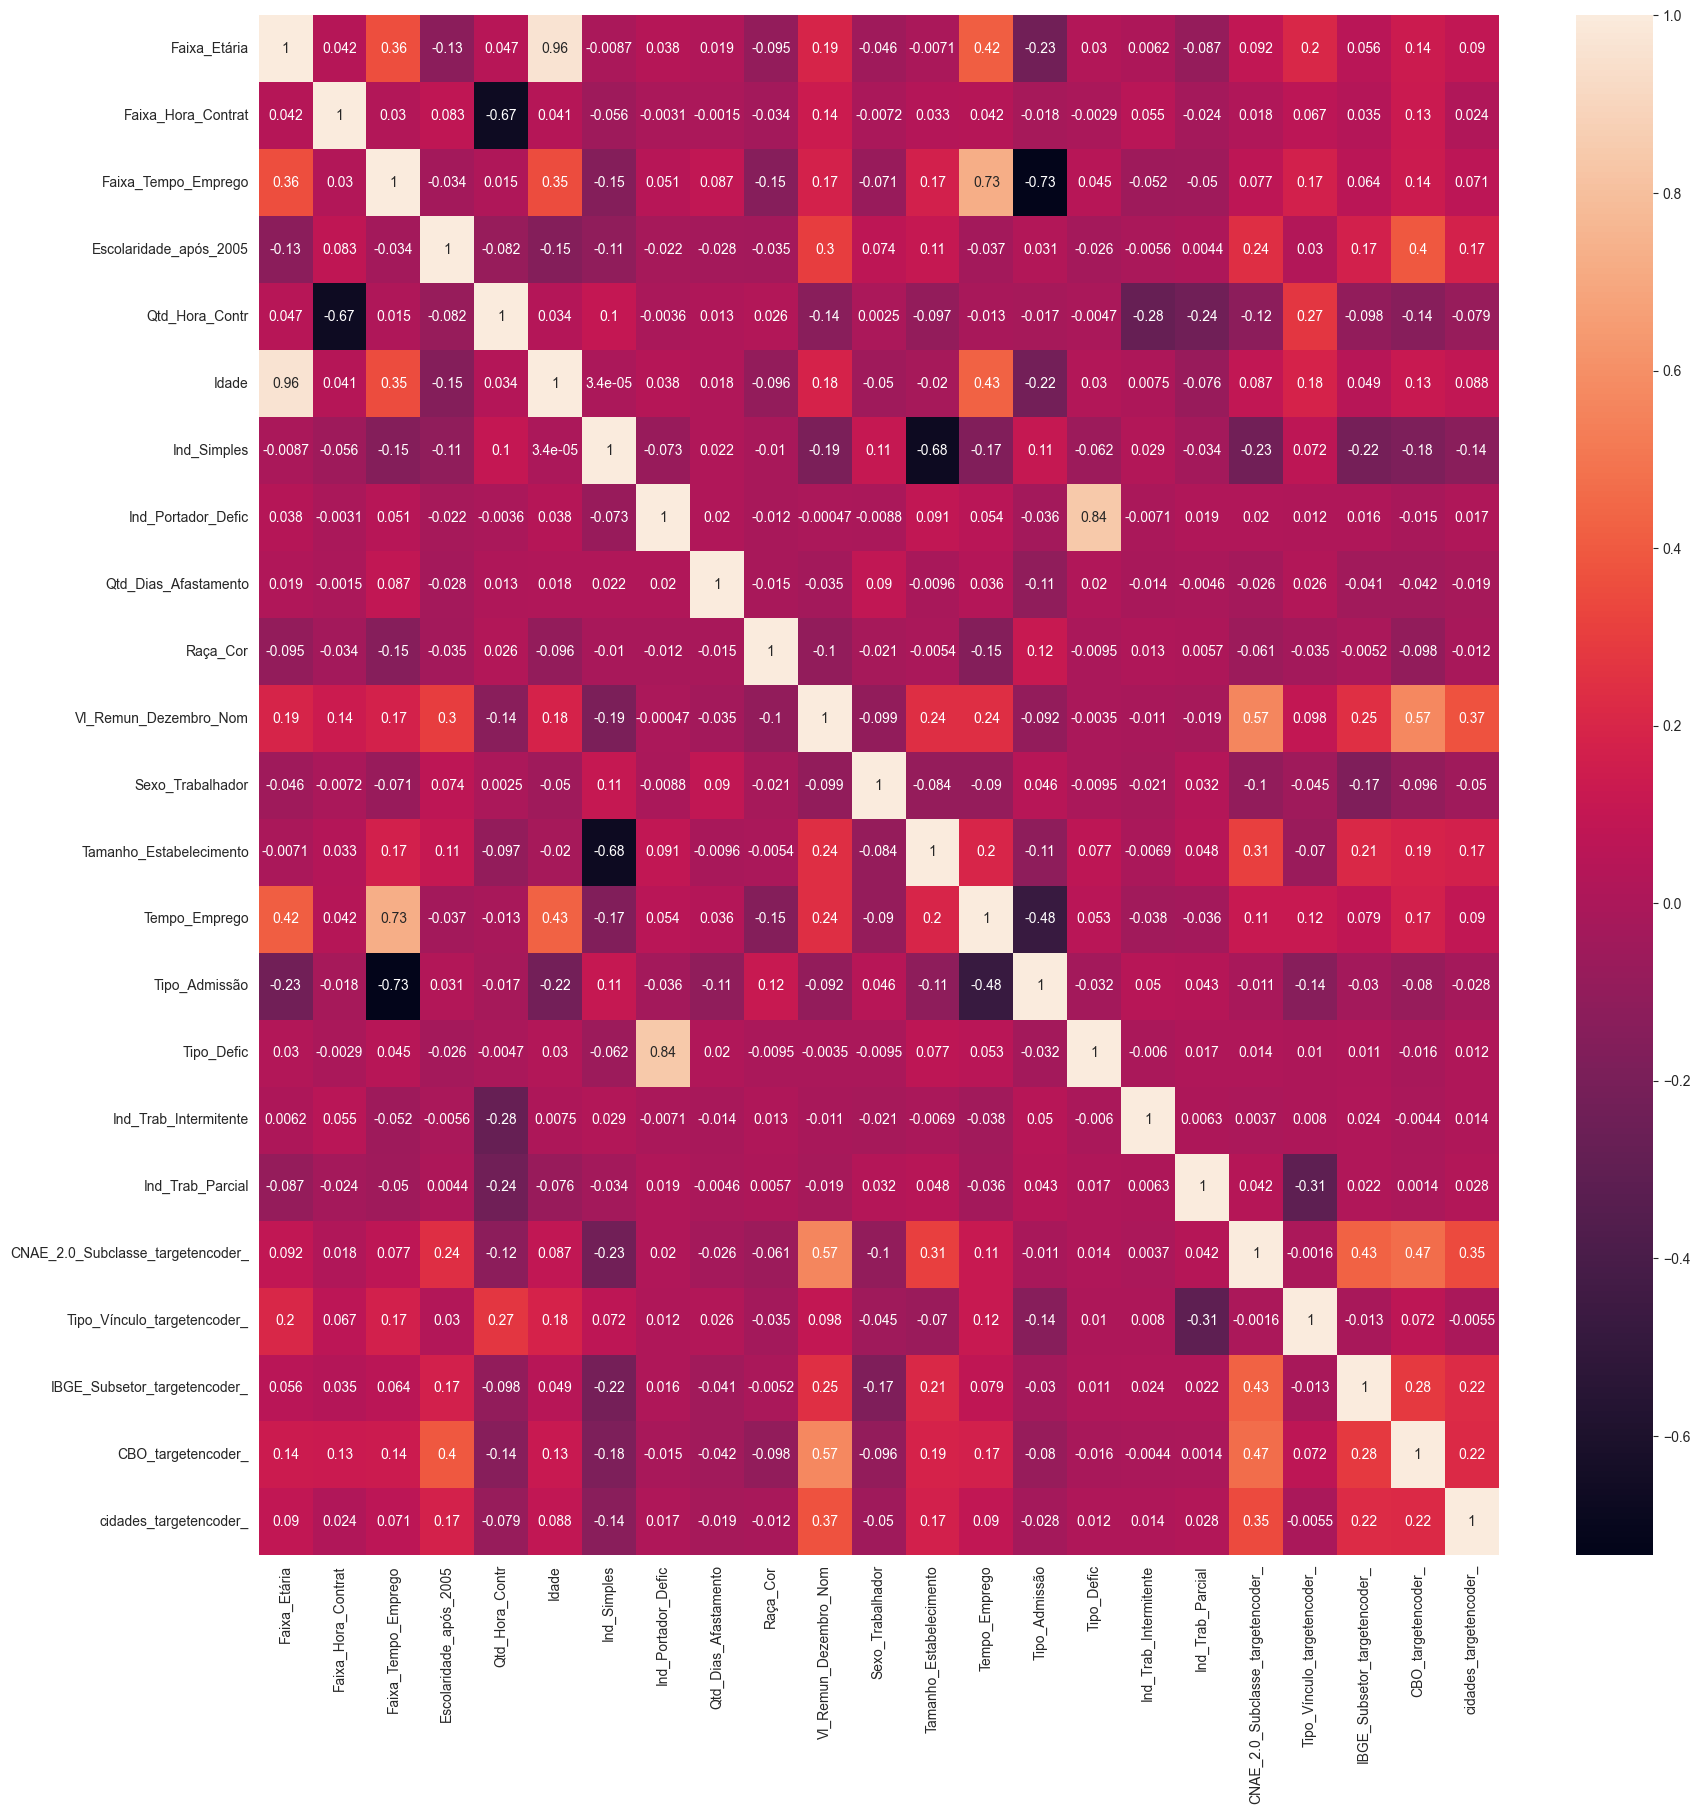

In [40]:
plt.rcParams["figure.figsize"] = [20, 20]
cormat = df_train.corr()
sns.heatmap(cormat, annot=True)

In [32]:
lst_CORR = df_train.columns.tolist()
lst_CORR.remove('Vl_Remun_Dezembro_Nom')
df_train_CORR = df_train[lst_CORR]

In [33]:
df_train_CORR.head()

,Faixa_Etária,Faixa_Hora_Contrat,Faixa_Tempo_Emprego,Escolaridade_após_2005,Qtd_Hora_Contr,Idade,Ind_Simples,Ind_Portador_Defic,Qtd_Dias_Afastamento,Raça_Cor,Sexo_Trabalhador,Tamanho_Estabelecimento,Tempo_Emprego,Tipo_Admissão,Tipo_Defic,Ind_Trab_Intermitente,Ind_Trab_Parcial,CNAE_2.0_Subclasse_targetencoder_,Tipo_Vínculo_targetencoder_,IBGE_Subsetor_targetencoder_,CBO_targetencoder_,cidades_targetencoder_
id,,,,,,,,,,,,,,,,,,,,,,
0,7,6,3,1,44,50,1,0,0,4,1,4,7.300,2,0,0,0,2012.803,3363.495,2012.400,2455.315,2662.986
1,7,1,6,1,1,61,0,0,20,2,1,7,37.600,0,0,0,0,3221.220,3363.495,4149.241,4420.601,3183.867
3,4,6,3,1,44,28,1,0,0,2,1,3,6.100,2,0,0,0,2231.034,3363.495,1877.463,2210.861,1971.877
4,7,6,3,1,44,64,0,0,172,4,1,6,9.600,2,0,0,0,3276.079,3363.495,4491.901,1583.565,2785.046
7,4,6,2,1,44,26,1,0,0,2,1,2,4.900,1,0,0,0,2645.733,3363.495,2448.238,2889.237,2967.764


In [34]:
chi_square_value, p_value = calculate_bartlett_sphericity(df_train_CORR)
chi_square_value, p_value

(4938764.26480416, 0.0)

In [35]:
kmo_model = calculate_kmo(df_train_CORR)
kmo_model

(array([0.60425544, 0.39228775, 0.66551201, 0.6883974 , 0.44505066,
        0.59809168, 0.63623945, 0.50950817, 0.71746243, 0.8891815 ,
        0.65847577, 0.64266563, 0.77122055, 0.69353548, 0.50772862,
        0.27252938, 0.56736207, 0.73317185, 0.51461799, 0.80554235,
        0.75027617, 0.84066414]),
 0.6136253134712851)

In [36]:
pca_ = PCA(n_components=2)
X_train_pca = pca_.fit_transform(df_train_CORR)
exp_var_pca = pca_.explained_variance_ratio_
D_PF_ = pd.DataFrame(exp_var_pca)
D_PF_.columns = ['variance explained']
E_PF_ = pd.DataFrame(np.cumsum(exp_var_pca))
E_PF_.columns = ['variance explained acum']
F_PF_ = pd.concat([D_PF_, E_PF_], axis=1)
F_PF_

,variance explained,variance explained acum
0,0.597,0.597
1,0.183,0.779
